# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated 

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | la asuncion
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | nkoteng
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | misratah
Processing Record 13 of Set 1 | terrace
Processing Record 14 of Set 1 | katsuura
Processing Record 15 of Set 1 | chicama
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | hearst
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | wasilla
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | tuktoyaktuk
Pr

City not found. Skipping...
Processing Record 39 of Set 4 | brockville
Processing Record 40 of Set 4 | tiksi
Processing Record 41 of Set 4 | asifabad
Processing Record 42 of Set 4 | dourdan
Processing Record 43 of Set 4 | namibe
Processing Record 44 of Set 4 | fortuna
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | rio cuarto
Processing Record 47 of Set 4 | saint anthony
Processing Record 48 of Set 4 | gamba
Processing Record 49 of Set 4 | cabo san lucas
Processing Record 0 of Set 5 | bawku
Processing Record 1 of Set 5 | lasa
Processing Record 2 of Set 5 | visnes
Processing Record 3 of Set 5 | porto novo
Processing Record 4 of Set 5 | westmont
Processing Record 5 of Set 5 | marawi
Processing Record 6 of Set 5 | progreso
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | wahran
City not found. Skipping...
Processing Record 9 of Set 5 | port alfred
Processing Record 10 of Set 5 | belaya gora
Processing Record 11 of Set 5 | moindou
Pro

Processing Record 33 of Set 8 | brigantine
Processing Record 34 of Set 8 | talalayivka
Processing Record 35 of Set 8 | sherkot
Processing Record 36 of Set 8 | sinnamary
Processing Record 37 of Set 8 | labytnangi
Processing Record 38 of Set 8 | canavieiras
Processing Record 39 of Set 8 | nurota
Processing Record 40 of Set 8 | mar del plata
Processing Record 41 of Set 8 | ariquemes
Processing Record 42 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 8 | novoagansk
Processing Record 44 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 8 | shizunai
Processing Record 46 of Set 8 | encheng
Processing Record 47 of Set 8 | asosa
Processing Record 48 of Set 8 | pascagoula
Processing Record 49 of Set 8 | camrose
Processing Record 0 of Set 9 | otane
Processing Record 1 of Set 9 | muli
Processing Record 2 of Set 9 | majene
Processing Record 3 of Set 9 | carman
Processing Record 4 of Set 9 | linxia
Processing Record 5 of Set 9 | calvia


Processing Record 21 of Set 12 | ratnagiri
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | mancora
Processing Record 24 of Set 12 | venado tuerto
Processing Record 25 of Set 12 | goderich
Processing Record 26 of Set 12 | hami
Processing Record 27 of Set 12 | buenos aires
Processing Record 28 of Set 12 | ube
Processing Record 29 of Set 12 | solhan
Processing Record 30 of Set 12 | the pas
Processing Record 31 of Set 12 | cabinda
Processing Record 32 of Set 12 | agadir
Processing Record 33 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 34 of Set 12 | usila
City not found. Skipping...
Processing Record 35 of Set 12 | preveza
Processing Record 36 of Set 12 | searcy
Processing Record 37 of Set 12 | cimitarra
Processing Record 38 of Set 12 | qui nhon
Processing Record 39 of Set 12 | presidencia roque saenz pena
Processing Record 40 of Set 12 | yago
Processing Record 41 of Set 12 | borgomanero
Processing Record 42 of Set 12 | fairbanks
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,8.84,65,20,0.89,AU,1685618656
1,punta arenas,-53.1500,-70.9167,4.06,81,75,5.14,CL,1685618411
2,broome,42.2506,-75.8330,18.15,76,0,0.45,US,1685618656
3,la asuncion,11.0333,-63.8628,25.85,89,72,5.14,VE,1685618656
4,avarua,-21.2078,-159.7750,17.03,88,18,1.03,CK,1685618656


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,8.84,65,20,0.89,AU,1685618656
1,punta arenas,-53.1500,-70.9167,4.06,81,75,5.14,CL,1685618411
2,broome,42.2506,-75.8330,18.15,76,0,0.45,US,1685618656
3,la asuncion,11.0333,-63.8628,25.85,89,72,5.14,VE,1685618656
4,avarua,-21.2078,-159.7750,17.03,88,18,1.03,CK,1685618656


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

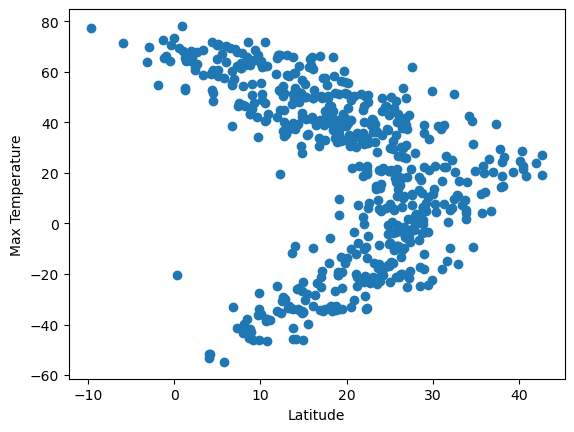

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

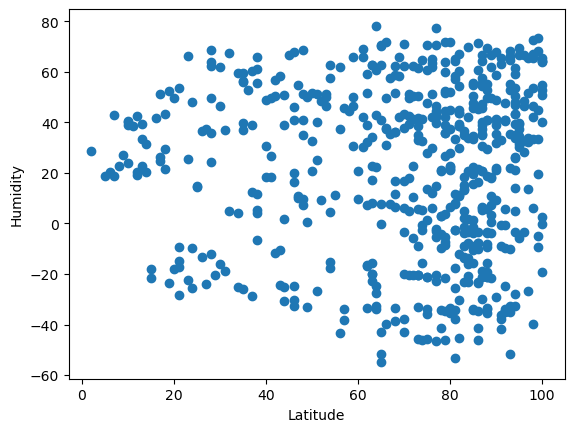

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

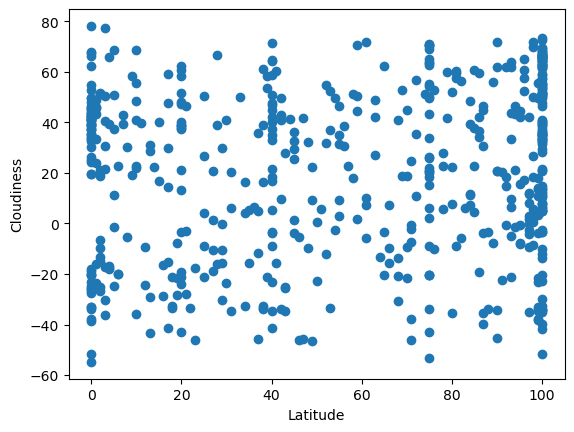

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

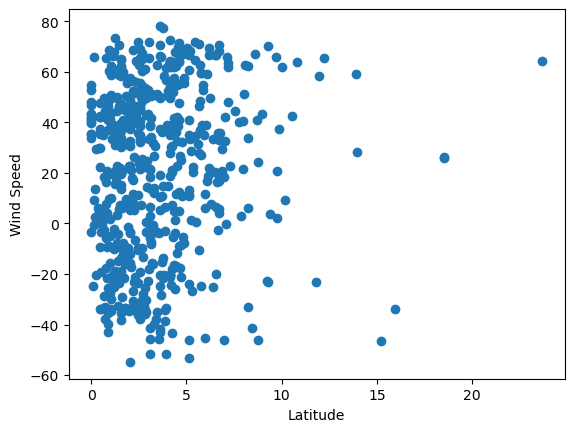

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship



In [13]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,broome,42.2506,-75.8330,18.15,76,0,0.45,US,1685618656
3,la asuncion,11.0333,-63.8628,25.85,89,72,5.14,VE,1685618656
5,sitka,57.0531,-135.3300,6.94,81,100,2.06,US,1685618657
6,hilo,19.7297,-155.0900,22.36,99,0,1.54,US,1685618657
7,nkoteng,4.5167,12.0333,30.31,54,85,0.75,CM,1685618657


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,8.84,65,20,0.89,AU,1685618656
1,punta arenas,-53.1500,-70.9167,4.06,81,75,5.14,CL,1685618411
4,avarua,-21.2078,-159.7750,17.03,88,18,1.03,CK,1685618656
12,chicama,-7.8447,-79.1469,21.30,86,19,1.36,PE,1685618657
15,hermanus,-34.4187,19.2345,18.78,81,100,0.96,ZA,1685618657


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7677311259957496


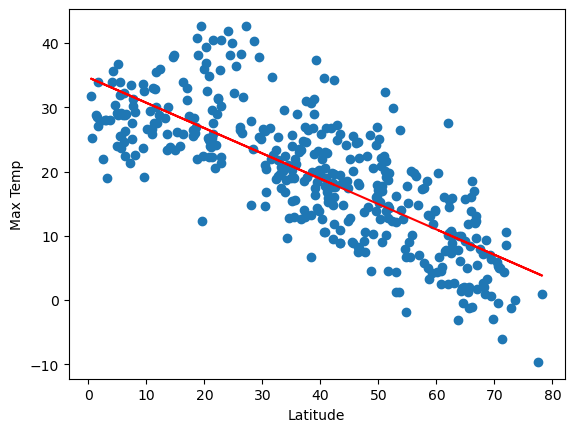

In [16]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.7736297170006914


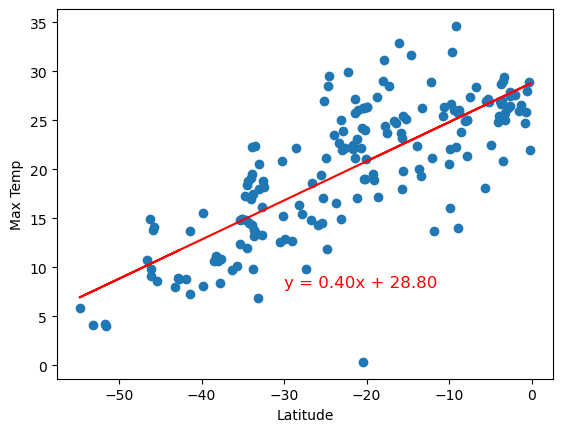

In [17]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

* In the Northern Hemisphere there is a considerable negative correlation -0.7677311259957496 between temperature and latitude. In the Southern Hemisphere, there is a significant positive correlation 0.7736297170006914 between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0667185037336293


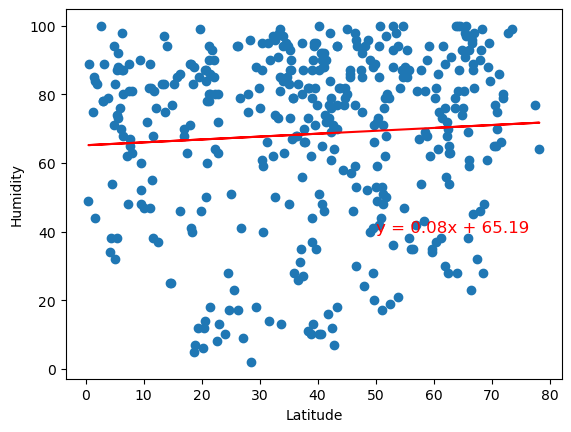

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.022833938855400852


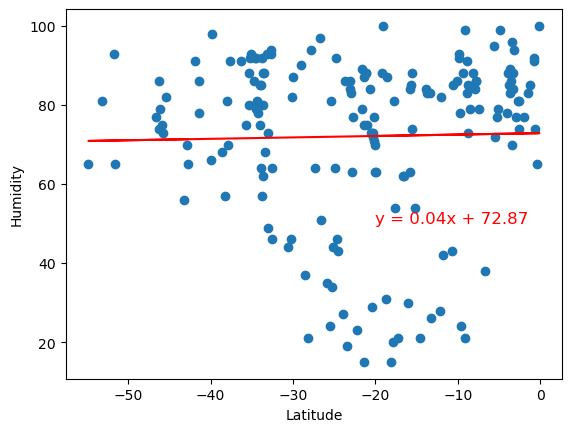

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

* Both Northern and Southern hemispheres have a very low positive correlation between himidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.018052243070791615


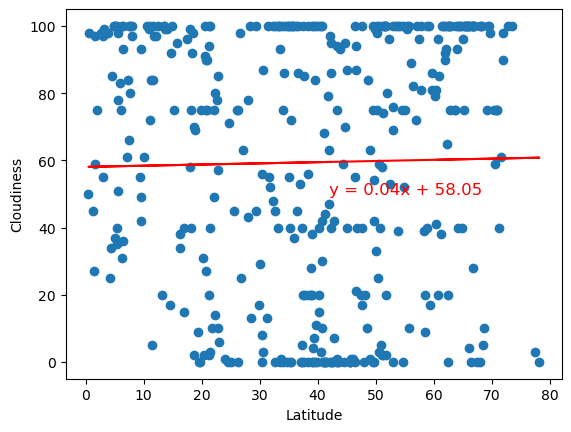

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.10573541301704717


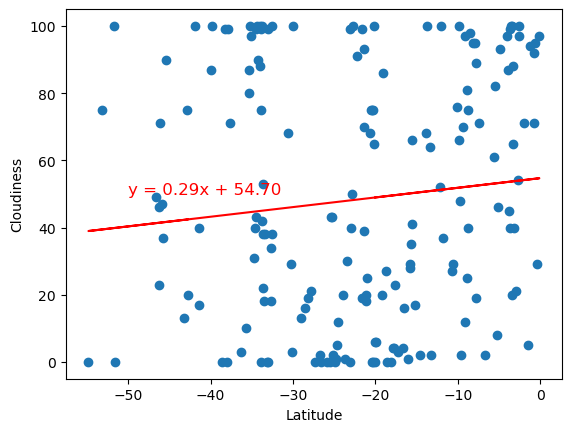

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

* Here we can see a very weak correlation between cloudiness and latitude in both hemispheres

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06019854786785686


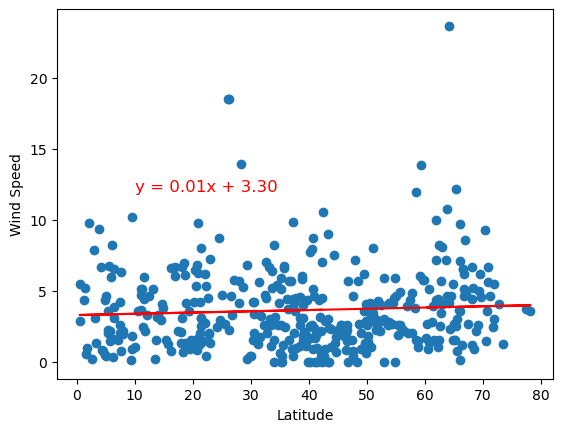

In [24]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.17875756558069295


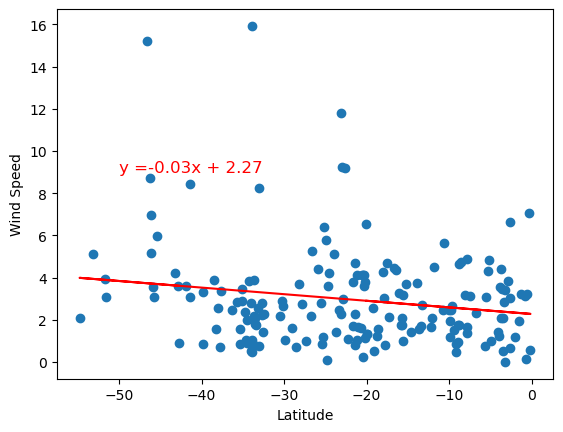

In [25]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

* There is a very weak postivie correlation between wind speed and latitude in the northern hemisphere (0.06019854786785686) and a negative one in the southern hemisphere (-0.17875756558069295)